In [1]:
import os
os.chdir("D:\\meridianthe4\\PML\\Cases-AI-1\\Spam_Classification")
import pandas as pd
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dbda.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv("SPAM_Data.csv")
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
corpus = []
stops = stopwords.words('english')
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

### Count Vectorization

In [7]:
cv = CountVectorizer(max_features=800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X, columns=cv.get_feature_names_out())
y = dataset['Category']

In [8]:
X.head()

,abiola,abl,abt,ac,account,activ,actual,ad,address,aft,...,yar,ye,yeah,year,yep,yesterday,yet,yo,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.9838516746411483


### TF-IDF Vectorization

In [10]:
cv = TfidfVectorizer(max_features=800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X, columns=cv.get_feature_names_out())
y = dataset['Category']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)
classifier = RandomForestClassifier(n_estimators=25, random_state=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9796650717703349


### WordCloud

In [13]:
corpus2 = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Message'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)
corpus2[:6]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv']

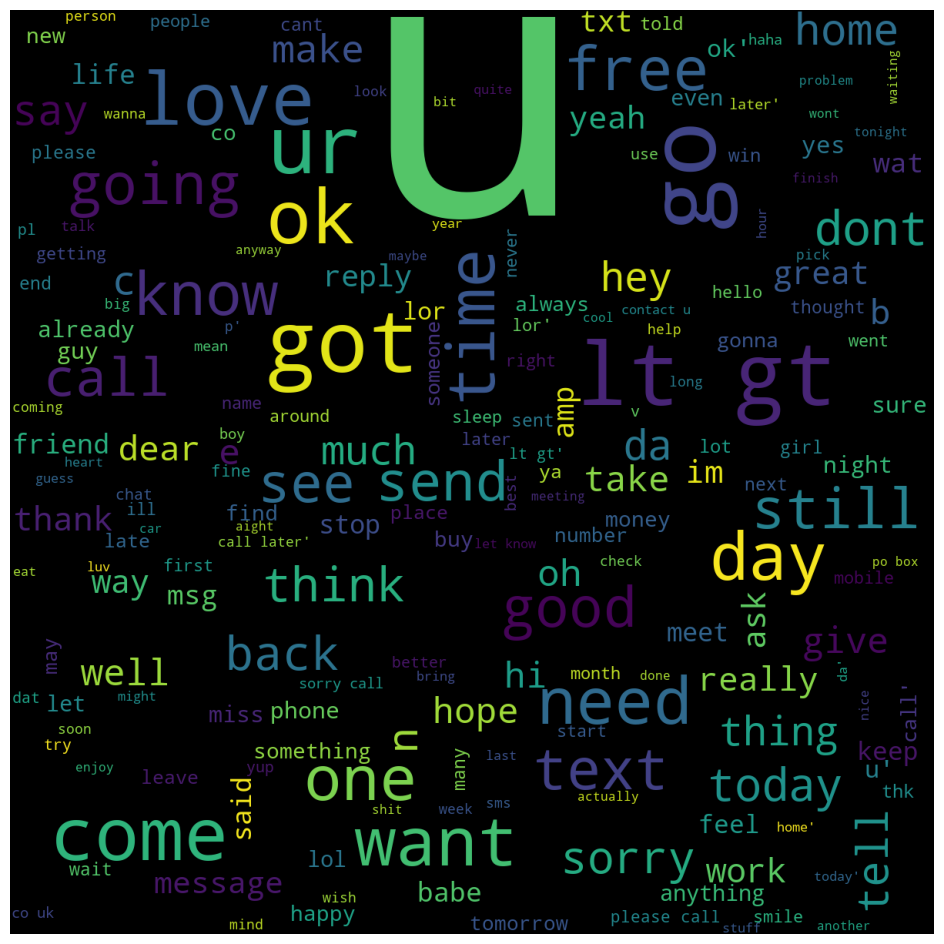

In [24]:
corp_str = str(corpus2)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0, width=1200, height=1200).generate(corp_str)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()